In [9]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import interact, interact_manual
from tqdm.notebook import tqdm
from time import sleep
%load_ext snakeviz

# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5

In [2]:
rad = lambda x: x/180*np.pi

In [3]:
import importlib
import two_d_tracer
importlib.reload(two_d_tracer)

<module 'two_d_tracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py'>

# Mirrors

In [5]:
scene = two_d_tracer.Scene([two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
                           [two_d_tracer.SurfaceReflective([0,0],[-np.cos(rad(45/2)),-np.sin(rad(45/2))]),
                           two_d_tracer.SurfaceReflective([0,-5], [0,1])])

In [6]:
scene.rays

[Ray([-10.   -2.5], [1. 0.]),
 Ray([-10.    -1.25], [1. 0.]),
 Ray([-10.   0.], [1. 0.]),
 Ray([-10.     1.25], [1. 0.]),
 Ray([-10.    2.5], [1. 0.])]

In [7]:
scene.run(margin=1e-10)

(-10.551776695293102, 1.5873106011551301, -5.375, 2.875)

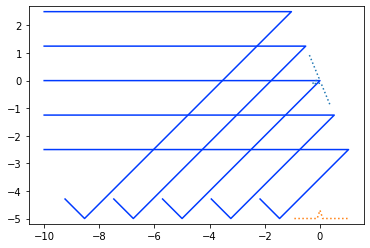

In [10]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Refracting surfaces

In [11]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [-1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [12]:
scene.run()

(-10.672847144899352,
 4.129790042886396,
 -3.8145138117693524,
 3.1047900427563975)

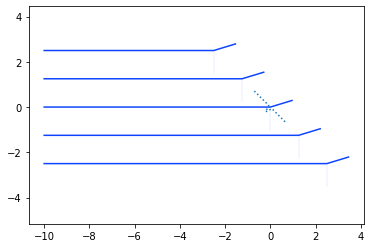

In [13]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [14]:
scene.rays

[Ray([ 3.4569429  -2.20972377], [0.9569429  0.29027623]),
 Ray([ 2.2069429  -0.95972377], [0.9569429  0.29027623]),
 Ray([0.9569429  0.29027623], [0.9569429  0.29027623]),
 Ray([-0.2930571   1.54027623], [0.9569429  0.29027623]),
 Ray([-1.5430571   2.79027623], [0.9569429  0.29027623]),
 Ray([ 2.5 -3.5], [ 2.22044605e-16 -1.00000000e+00]),
 Ray([ 1.25 -2.25], [ 2.22044605e-16 -1.00000000e+00]),
 Ray([ 2.22044605e-16 -1.00000000e+00], [ 2.22044605e-16 -1.00000000e+00]),
 Ray([-1.25  0.25], [ 2.22044605e-16 -1.00000000e+00]),
 Ray([-2.5  1.5], [ 2.22044605e-16 -1.00000000e+00])]

In [15]:
scene.rays[0].angle

0.2945154851081369

In [16]:
# Compare to Snell's (algebra in Xournal)
rad(45) - np.arcsin(1/1.5*np.sin(rad(45)))

0.29451548510813697

# A glass slab

In [17]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [-1, 0], None, 1, 1.5),
                two_d_tracer.Surface([2,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [18]:
scene.rays[0].angle

-0.4636476090008061

In [19]:
np.arcsin(1/1.5*np.sin(scene.rays[0].angle))

-0.30274595162300433

In [20]:
scene.step()
scene.propagate(1e-14)
print(scene.rays[0].angle)
scene.step()
scene.propagate(1e-14)
scene.step()

-0.30274595162300433


(-5.3947213595499965,
 3.289148550549921,
 -6.686859599864289,
 2.9374695047554424)

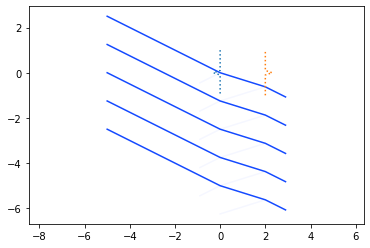

In [21]:
fig, ax = plt.subplots()
scene.plot(ax)   
ax.axis("equal")

In [22]:
scene.rays[0].angle

-0.463647609000806

# Retroreflector

In [23]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0.1,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,2], [1, 1], None, 1, 1.5),
                two_d_tracer.Surface([0,-2], [1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [24]:
scene.run()

(-5.345, 2.244999999999999, -2.9778174593052023, 2.9778174593052023)

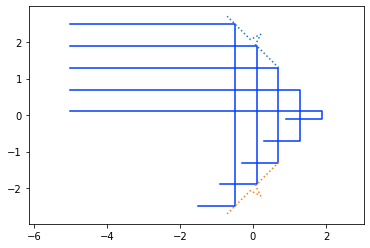

In [25]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [26]:
scene.rays

[Ray([ 0.9 -0.1], [-1.  0.]),
 Ray([ 0.3 -0.7], [-1.  0.]),
 Ray([-0.3 -1.3], [-1.  0.]),
 Ray([-0.9 -1.9], [-1.  0.]),
 Ray([-1.5 -2.5], [-1.  0.])]

# Testing Total Internal Reflection

In [4]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [np.cos(y),np.sin(y)]) for y in np.linspace(0,np.pi/4,100)] + [two_d_tracer.Ray([-1, np.arcsin(1/1.5)], [np.cos(np.arcsin(1/1.5)),np.sin(np.arcsin(1/1.5))],600)],
    "objects": [two_d_tracer.Surface([0,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [5]:
# Critical angle
np.arcsin(1/1.5)*180/np.pi

41.810314895778596

In [6]:
# Three of the angles tested are above the critical angle, those, are reflected
np.linspace(0,np.pi/4,30)*180/np.pi

array([ 0.        ,  1.55172414,  3.10344828,  4.65517241,  6.20689655,
        7.75862069,  9.31034483, 10.86206897, 12.4137931 , 13.96551724,
       15.51724138, 17.06896552, 18.62068966, 20.17241379, 21.72413793,
       23.27586207, 24.82758621, 26.37931034, 27.93103448, 29.48275862,
       31.03448276, 32.5862069 , 34.13793103, 35.68965517, 37.24137931,
       38.79310345, 40.34482759, 41.89655172, 43.44827586, 45.        ])

In [7]:
scene.run()

<IPython.core.display.Javascript object>


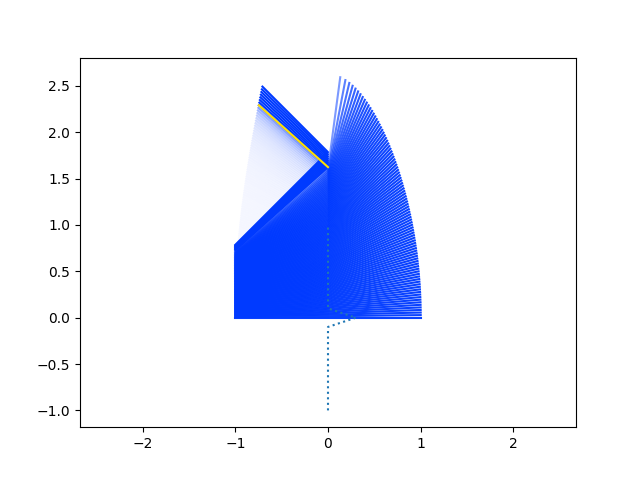

(-1.10000000022, 1.10000000022, -1.181207742371344, 2.8053625897982264)

In [8]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Ray canvas

In [32]:
canvas = two_d_tracer.RayCanvas([0,-3], [0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [1, 1], None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [33]:
scene.run()

In [34]:
canvas

RayCanvas([0, -3], [0. 1.]): [2.5, 1.2499999999999996, 6.66133814775094e-16, -1.2499999999999991, -2.4999999999999987]

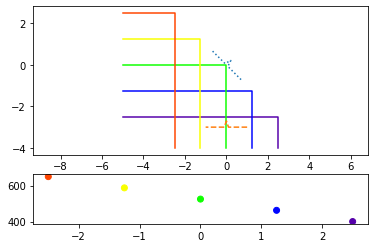

In [35]:
fig, ax = plt.subplots(2, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[0].axis("equal")
ax[1].scatter(canvas.points, canvas.wavelengths, c=canvas.c)

# Sphere

In [36]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5),two_d_tracer.SphereReflective([8,0], 2.5, None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [37]:
scene.run()
scene.propagate(2)

(-5.0, 10.0)

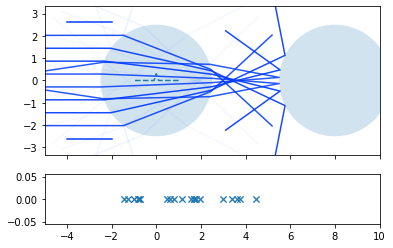

In [38]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")
ax[0].set_xlim(-5,10)

# Focus in the sphere

In [39]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
n2 = 3
# two_d_tracer.ReflectiveSphere([8,0], 2.5, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [1,0]) for y in np.linspace(-0.1,0.1, 50)],
    "objects": [two_d_tracer.Sphere([2.5,0], 2.5, [rad(90), rad(-90)], 1, n2),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [40]:
scene.run()

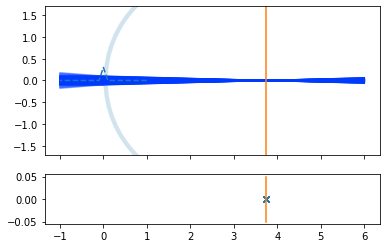

In [41]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus for a single spherical surface in the paraxial approximation, rays colimated:
f = (n2 * 2.5 / (n2-1))
ax[0].plot([f,f], [-2.5,2.5])
ax[1].plot([f,f], [-0.05,0.05])

# Limits

## Mirrors

In [42]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.SurfaceReflective([0,0], [-1,1], 2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [43]:
scene.run()

(-5.42500000001, 3.92500000021, -2.75, 2.75)

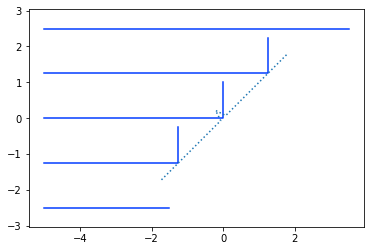

In [44]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

## Refractive planes

In [45]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0.3]) for y in np.linspace(-1.5,1.5, 11)],
    "objects": [two_d_tracer.Surface([-1,1], [-1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.Surface([1,1], [1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.Surface([0,0], [0,-1], 2, 1, 1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [46]:
scene.run()

(-1.0, 2.5)

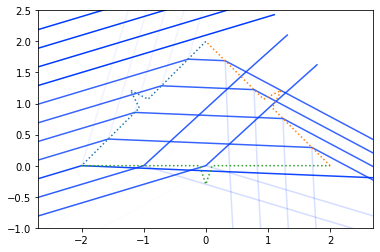

In [47]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-1,2.5)

## Spheres

In [48]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, [rad(150), rad(-150)], 1, 1.5),
               two_d_tracer.SphereReflective([4,0], 2.5, [rad(-50), rad(50)])]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [49]:
scene.run()

(-5.57499126479342, 7.074816560661817, -3.6824830170401643, 3.682483017040163)

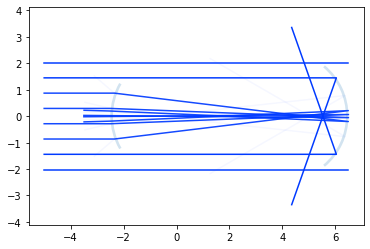

In [50]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# The lensmaker equation

$$\frac{1}{f}=(n-1)\left(\frac{1}{R_1}-\frac{1}{R_2}\right)$$ for a think lens. This doesn't quite work, so let's try $$\frac{1}{f} = (n-1) \left( \frac{1}{R_1} - \frac{1}{R_2} + \frac{(n-1)d}{n R_1 R_2} \right),$$
then the distance from the end of the lens to the focus is given as
$$\mbox{BFD} = f \left( 1 - \frac{ (n-1) d}{n R_1} \right),$$
which is taken from https://en.wikipedia.org/wiki/Focal_length.

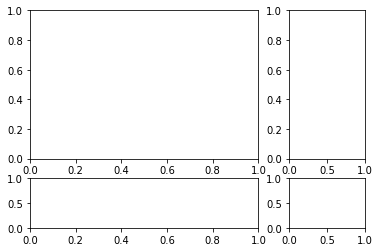

interactive(children=(FloatSlider(value=1.5, description='n', max=4.5, min=-1.5), FloatSlider(value=2.0, descr…

In [51]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

@interact
def draw(n=1.5, R1=2., R2=-2., d=1.):
    global canvas, canvas2
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-0.1,0.1, 20)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], true_color=False)
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    if len(canvas.points):
        ax[2].scatter(canvas.points, [0 for p in canvas.points], c=canvas.ca, marker="x")
    if len(canvas2.points):
        ax[1].scatter([0 for p in canvas2.points], canvas2.points, c=canvas2.ca, marker="x")
    ax[2].plot([ffdc,ffdc], [-1, 1])
    ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

# Wavelength to rgb testing

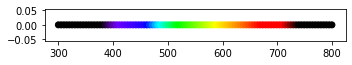

In [52]:
wvl = np.linspace(300, 800, 100)
w = [two_d_tracer.nm_to_rgb(x) for x in wvl]

fig, ax = plt.subplots(figsize=(5,1))
ax.scatter(wvl, np.zeros(wvl.size), c=w)
plt.tight_layout()

# Rainbow prism

In [53]:
prism_angle = rad(80)/2
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 11)],
    "objects": [two_d_tracer.Surface([-np.sin(prism_angle),np.cos(prism_angle)], [-np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.Surface([np.sin(prism_angle),np.cos(prism_angle)], [+np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.Surface([0,0], [0,-1], 2*np.sin(prism_angle), 1, n_glass)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [54]:
scene.run(announce_steps=True)

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9


(-1.0, 1.0)

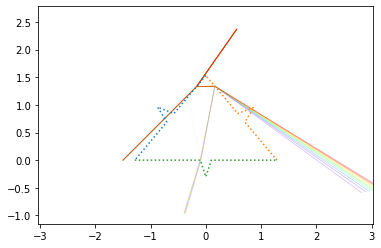

In [55]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7})
ax.axis("equal")
ax.set_xlim(-1,1)

# Chromatic aberration

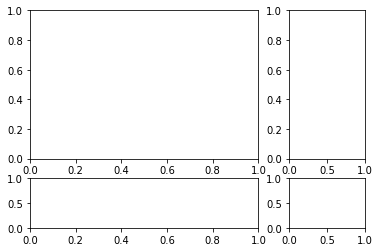

interactive(children=(FloatSlider(value=1.514, description='n', max=1.5295687672239824, min=1.5128024728723604…

In [57]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

canvas = None

@interact(n=(1.5128024728723604, 1.5295687672239824, 0.005))
def draw(n=1.514, R1=2., R2=-2., d=1.):
    global canvas
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0], wl) for wl in np.linspace(410,710, 10) for y in np.linspace(-0.1,0.1,10)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n_glass),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n_glass), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run(limit=5)
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], ray_kwargs={"lw":.1})
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[2].scatter(canvas.points, canvas.wavelengths, c=canvas.c)
    ax[1].scatter(canvas2.wavelengths, canvas2.points, c=canvas2.c)
    ax[2].plot([ffdc,ffdc], [410, 710])
#     ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

# Reflection momentum calculation

## Plane

In [58]:
mirror = two_d_tracer.SurfaceReflective([0,0], [1, 1], None)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [mirror]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [59]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

[0.00980751 0.        ]


In [60]:
scene.run()

(-5.375, 2.875, -3.80000000021, 2.80000000001)

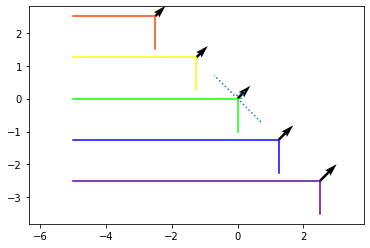

In [61]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [62]:
# The momentum change observed by the plane
mirror.momenta

[array([0.0025, 0.0025]),
 array([0.00216216, 0.00216216]),
 array([0.00190476, 0.00190476]),
 array([0.00170213, 0.00170213]),
 array([0.00153846, 0.00153846])]

In [63]:
# Total change of mirror momentum
np.sum(mirror.momenta, axis=0)

array([0.00980751, 0.00980751])

In [64]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

[ 2.17770541e-18 -9.80751326e-03]


In [65]:
# Change in total photon momentum
final-initial

array([-0.00980751, -0.00980751])

In [66]:
# Change of momentum for the entire system:
np.sum(mirror.momenta, axis=0) + final - initial
# Woo, the system has conserved momentum!

array([0., 0.])

## Sphere

In [67]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0,2.49, 5)],
    "objects": [two_d_tracer.SphereReflective([0,0],2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

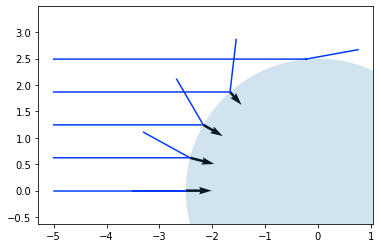

In [68]:
fig, ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")
plt.show()

In [69]:
scene.momentum

array([ 0.01344741, -0.00539028])

# Refraction momentum calculation

## Surface

In [70]:
surface1 = two_d_tracer.Surface([2,0], [1,1], 5*np.sqrt(2), 1, 1.2)
surface2 = two_d_tracer.Surface([-2,0], [-1,1], 2*np.sqrt(2), 1, 1.2)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+1.5)*50)) for y in np.linspace(-1.5,1.5, 5)],
    "objects": [two_d_tracer.LineSegment([-4,-2],[0,2],1,1.2),
                two_d_tracer.LineSegment([0,2],[4,-2],1,1.2),
                two_d_tracer.LineSegment([4,-2],[-4,-2],1,1.2)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [71]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir*ray.weight for ray in scene.rays], axis=0)
print(initial)

[0.01066038 0.        ]


In [72]:
scene.run()

(-5.481469028576641, 5.11084960010947, -3.256763500435529, 2.774131595992168)

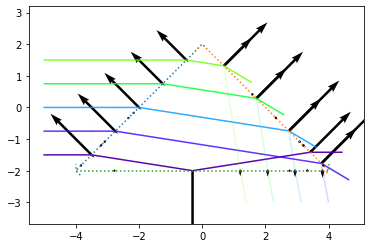

In [73]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [74]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir*ray.weight for ray in scene.rays], axis=0)
print(final)

[ 0.00840706 -0.00466035]


In [75]:
# Change in total photon momentum
final-initial

array([-0.00225332, -0.00466035])

In [76]:
np.sum(scene.momenta, axis=0)

array([0.00225332, 0.00466035])

## Sphere

In [77]:
sphere = two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.3)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y)*200)) for y in np.linspace(0,1.5, 5)],
    "objects": [sphere]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [78]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir*ray.weight for ray in scene.rays], axis=0)
print(initial)

[0.00945202 0.        ]


In [79]:
scene.run()

(-5.42500000002, 3.92500000042, -3.302471395566306, 3.73875218157154)

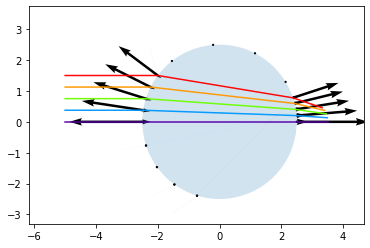

In [80]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [81]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir*ray.weight for ray in scene.rays], axis=0)
print(final)

[ 0.00871404 -0.00114629]


In [82]:
# Change in total photon momentum
final-initial

array([-0.00073797, -0.00114629])

In [83]:
np.sum(scene.momenta, axis=0)

array([0.00073797, 0.00114629])

# Sphere stability

In [9]:
sc_dsc = {
#     "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(2,-2, 2**10+1)],
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in two_d_tracer.linspace(-2,2,20000)],
    "objects": [two_d_tracer.SphereReflective([0,0],2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

<IPython.core.display.Javascript object>


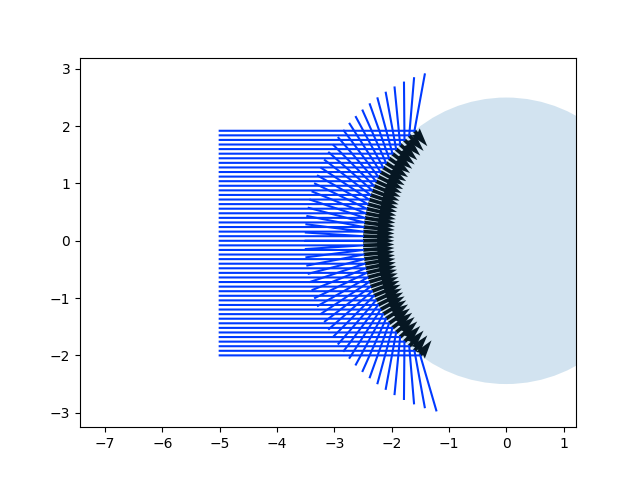

In [10]:
fig, ax = plt.subplots()
scene.plot(ax, m_quiver=True, sparse=400)
ax.axis("equal")
plt.show()

In [86]:
np.sum(scene.momenta, axis=0)

array([6.73786152e+01, 2.51534904e-17])

In [87]:
scene.momentum

array([6.73786152e+01, 2.51534904e-17])

In [88]:
two_d_tracer.linspace(-2,2,1001)

array([-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ])

## np.linspace issues

<IPython.core.display.Javascript object>


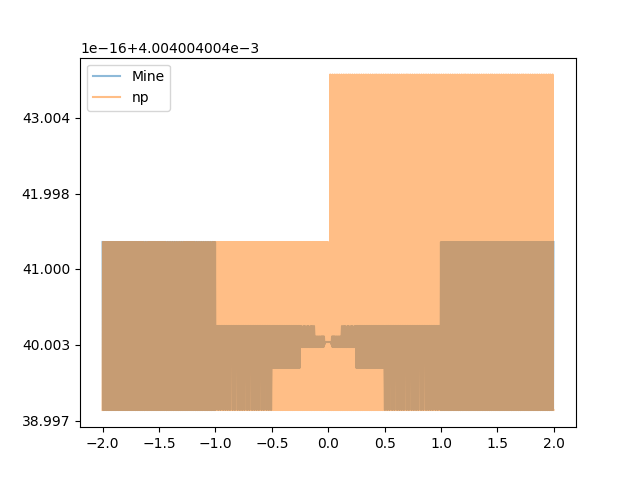

In [12]:
ar = two_d_tracer.linspace(-2,2,1000)
br = np.linspace(-2,2,1000)
fig, ax = plt.subplots()
ax.plot(ar[:-1], ar[1:]-ar[:-1], label="Mine", alpha=0.5)
ax.plot(br[:-1], br[1:]-br[:-1], label="np", alpha=0.5)
ax.legend()

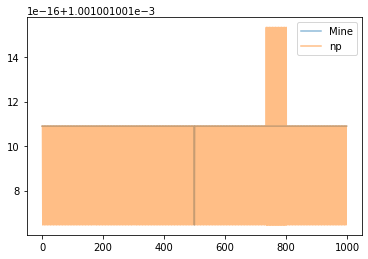

In [97]:
# Does reasonably well with ranges at the same order of magnitude
ar = two_d_tracer.linspace(2,3,1000)
br = np.linspace(2,3,1000)
fig, ax = plt.subplots()
ax.plot(ar[1:]-ar[:-1], label="Mine", alpha=0.5)
ax.plot(br[1:]-br[:-1], label="np", alpha=0.5)
ax.legend()

<IPython.core.display.Javascript object>


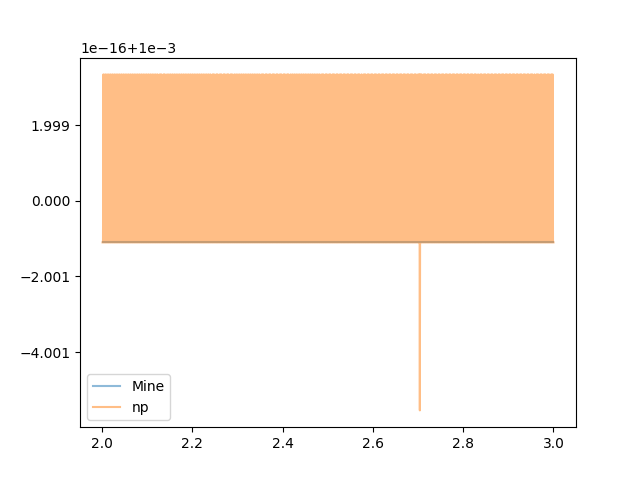

In [13]:
# Does much better  with ranges at the same order of magnitude and odd numbers of samples
ar = two_d_tracer.linspace(2,3,1001)
br = np.linspace(2,3,1001)
fig, ax = plt.subplots()
ax.plot(ar[1:], ar[1:]-ar[:-1], label="Mine", alpha=0.5)
ax.plot(br[1:], br[1:]-br[:-1], label="np", alpha=0.5)
ax.legend()

# Hollow sphere

In [36]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y)*100)) for y in np.linspace(0.2,2.4, 5)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5), two_d_tracer.Sphere([0,0], 2, None, 1.5, 1)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [37]:
scene.run(limit=7)

<IPython.core.display.Javascript object>


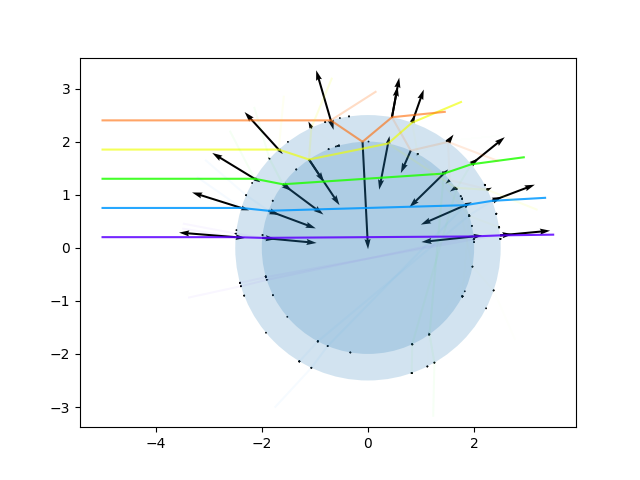

(-5.424716653102247, 3.9190497151471804, -3.49038386343652, 3.6927510883683636)

In [38]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True, m_quiver_kwargs={"scale":1e-2})
ax.axis("equal")

In [102]:
# The y component is expected to be negative - the hollow sphere is pushed out of the ray.
np.sum(scene.momenta, axis=0)

array([ 0.00218686, -0.0009763 ])

## Inner radius dependence

In [203]:
# Uncomment the commented lines to get a progress animation
# fig, ax = plt.subplots()
mms = []
rs = np.linspace(0.1,2.49,25)
for r in tqdm(rs):
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0,2.4, 100)],
        "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5), two_d_tracer.Sphere([0,0], r, None, 1.5, 1)]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    mms.append(np.sum(scene.momenta, axis=0))
#     ax.clear()
#     scene.plot(ax, m_quiver=False)
#     ax.axis("equal")
#     fig.canvas.draw()
#     sleep(1)
mms = np.array(mms)

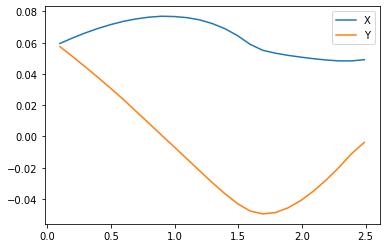

In [204]:
fig, ax = plt.subplots()
ax.plot(rs, mms[:,0], label="X")
ax.plot(rs, mms[:,1], label="Y")
ax.legend()

# Parabola

In [105]:
canvas = two_d_tracer.RayCanvas([0,1],[1,0],1)
sc_dsc = {
    "rays": [two_d_tracer.Ray([y, -0.5], [0,1]) for y in np.linspace(-2,2, 21)]+
            [two_d_tracer.Ray([y, 4], [0,-1], 600) for y in np.linspace(0.2,1.5, 11)]+
            [two_d_tracer.Ray([-4, y+0.3], [1,0], 500) for y in np.linspace(0.2,1.5, 11)]+
            [two_d_tracer.Ray([y, 4], [0.01,-1], 700) for y in np.linspace(0.2,1.5, 11)],
    "objects": [two_d_tracer.ParabolaReflective(1,0,0), two_d_tracer.RayCanvas([0,5],[0,1]), canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [106]:
scene.run(limit=4)

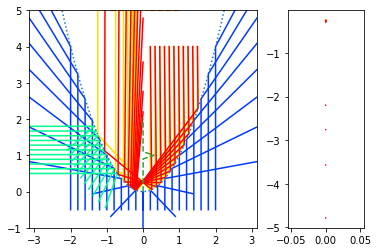

In [107]:
fig, ax = plt.subplots(1, 2, gridspec_kw={"width_ratios":(3,1)})
scene.plot(ax[0])
ax[0].axis("equal")
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-1,5)
ax[1].scatter([0 for p in canvas.points], canvas.points, color=canvas.c, marker="x", s=0.2)

In [108]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y+0.3], [1,0]) for y in np.linspace(0.2,1.5, 11)]+
            [two_d_tracer.Ray([-2, 2.5], [1,0])],
    "objects": [two_d_tracer.Parabola(1,0,0, [-1.5,1.5], n_in=1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [109]:
scene.run()

(-4.151734557338313,
 2.9017518488471663,
 -1.1148289963613707,
 13.669610000486665)

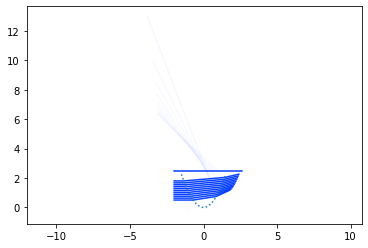

In [110]:
fig,ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Line segments

In [111]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y], [1,0]) for y in np.linspace(-2.5,2.5, 11)],
    "objects": [two_d_tracer.LineSegment([-2,-1], [2,1],n_in=1.5),
                two_d_tracer.LineSegmentReflective([1,-2], [3,-1]),
                two_d_tracer.LineSegment([3,1], [1,0], n_in=1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

(-2.288317859529106, 4.054675050111223, -2.75, 2.75)

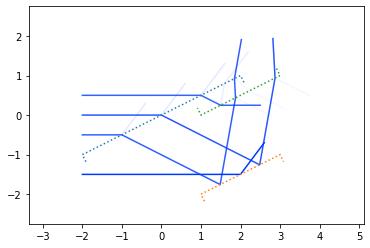

In [112]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Prism v2: Line Segment Boogaloo

The results are consistent with the previous implementation

In [113]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(80)/2
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 11)],
    "objects": [two_d_tracer.LineSegment([-2*np.sin(prism_angle),0], [0,2*np.cos(prism_angle)], n_in=n_glass),
                two_d_tracer.LineSegment([0,2*np.cos(prism_angle)], [2*np.sin(prism_angle),0], n_in=n_glass),
                two_d_tracer.LineSegment([2*np.sin(prism_angle),0], [-2*np.sin(prism_angle),0], n_in=n_glass)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

(-1.6392787609686539,
 1.4248539803417324,
 -1.1353525691596666,
 2.4415815364671634)

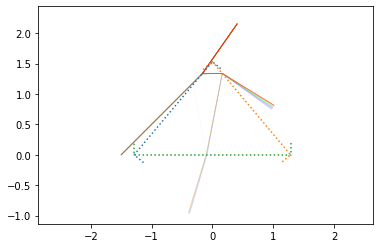

In [114]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7})
ax.axis("equal")

# Object containers

In [116]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(60)/2

prism1 = two_d_tracer.ObjectContainer([
    two_d_tracer.LineSegment([-2*np.sin(prism_angle),0], [0,2*np.cos(prism_angle)], n_in=n_glass),
    two_d_tracer.LineSegment([0,2*np.cos(prism_angle)], [2*np.sin(prism_angle),0], n_in=n_glass),
    two_d_tracer.LineSegment([2*np.sin(prism_angle),0], [-2*np.sin(prism_angle),0], n_in=n_glass)
])

d=1.5
prism2 = two_d_tracer.ObjectContainer([
    two_d_tracer.LineSegment([-2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], [2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], n_in=n_glass),
    two_d_tracer.LineSegment([2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], [d,0], n_in=n_glass),
    two_d_tracer.LineSegment([d,0],[-2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], n_in=n_glass),
], label="Prism 2")

sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 5)],
    "objects": prism1.objects + prism2.objects
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

In [117]:
print(prism1)
print()
print(prism2)

ObjectContainer([Surface([-0.5        0.8660254], [-0.8660254  0.5      ]), Surface([0.5       0.8660254], [0.8660254 0.5      ]), Surface([0. 0.], [ 0. -1.])])

Prism 2: ObjectContainer([Surface([1.5        1.73205081], [0. 1.]), Surface([2.        0.8660254], [ 0.8660254 -0.5      ]), Surface([1.        0.8660254], [-0.8660254 -0.5      ])])


(-2.012260614337779,
 3.3413839744395393,
 -1.0225861390120765,
 2.7546369468362224)

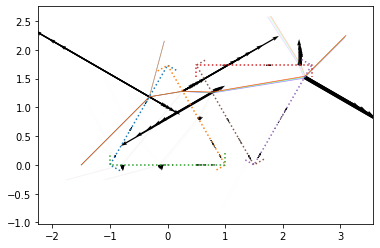

In [118]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7}, m_quiver=True)
ax.axis("equal")

In [122]:
prism1.momentum

array([-0.00029906,  0.00424485])

In [123]:
prism2.momentum

array([ 0.00427426, -0.00456054])

In [124]:
scene.momentum

array([ 0.0039752 , -0.00031568])

In [125]:
scene.momentum - prism1.momentum - prism2.momentum

array([8.67361738e-19, 1.73472348e-18])

# Angular momentum test

In [126]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([0,-1]), np.array([0,1])]
line.m_pos = [np.array([-1,0]), np.array([1,0])]
line.angular_momentum

2.0

In [127]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([0,-1]), np.array([0,1])]
line.m_pos = [np.array([-0.5,0]), np.array([0.5,0])]
line.angular_momentum

1.0

In [128]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([1,-1]), np.array([1,1])]
line.m_pos = [np.array([-1,0]), np.array([1,0])]
line.angular_momentum

2.0

In [129]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([1,1]), np.array([-1,-1])]
line.m_pos = [np.array([-1,1]), np.array([1,-1])]
line.angular_momentum

-4.0

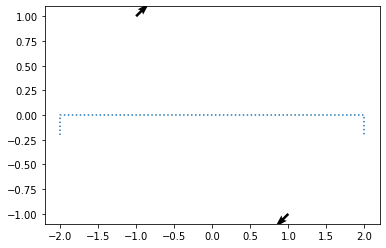

In [130]:
scene = two_d_tracer.Scene([], [line])
fig, ax = plt.subplots()
scene.plot(ax, m_quiver=True)

# Angular momentum for a sphere

In [131]:
sphere = two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(1,2.6, 100)],
    "objects": [sphere]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

(-5.42198057990622, 3.86159217803062, -3.7738886791772033, 3.7138577595472904)

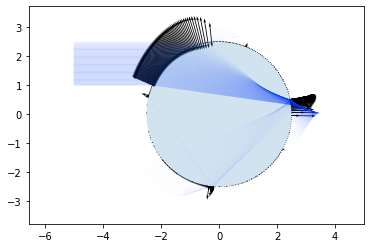

In [132]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.1}, m_quiver=True)
ax.axis("equal")

In [133]:
sphere.momentum

array([0.06919284, 0.08317025])

In [134]:
sphere.angular_momentum

-2.5423808062762357e-17

In [135]:
# The momentum and normal are parallel, but not quite
[np.dot(sphere.m_pos[0],sphere.momenta[0])/np.linalg.norm(sphere.m_pos[0])/np.linalg.norm(sphere.momenta[0]) for i in range(len(sphere.momenta))]

[0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999

# Angular momentum for a mirror

In [136]:
mirror = two_d_tracer.SurfaceReflective([0,0], [-1, 0])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y], [1,0.5]) for y in np.linspace(1,2.6, 25)],
    "objects": [mirror]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

(-2.1, 0.1, -1.25236067977947, 4.2995742753688715)

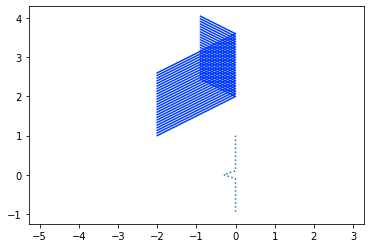

In [137]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [138]:
mirror.angular_momentum

-0.2681366311348784

# Random ray bundles

## Basic distribution test

In [139]:
bundle = two_d_tracer.RandomRayBundle([0,0], [0,1], 10000, 1, 600, two_d_tracer.gaussian_randoms_factory(1), two_d_tracer.random_sign, label="Test bundle")

In [140]:
print(bundle)

Test bundle: RandomRayBundle(10000 rays)


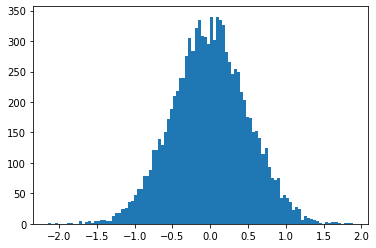

In [141]:
fig, ax = plt.subplots()
ax.hist([ray.origin[0] for ray in bundle.rays], bins=100)
plt.show()

In [142]:
canvas = two_d_tracer.RayCanvas([-2,0], [-1,0])
sc_dsc = {
    "rays": two_d_tracer.RandomRayBundle([0,1.5], [0,-1], 100, 1, 600, two_d_tracer.gaussian_randoms_factory(0.5), two_d_tracer.random_sign).rays,
    "objects": [two_d_tracer.SurfaceReflective([0,0], [-1,1], radius=1),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

(array([ 5.,  6., 13.,  9., 11., 17., 20., 13.,  3.,  2.]),
 array([-0.52562104, -0.42284462, -0.32006819, -0.21729177, -0.11451534,
        -0.01173891,  0.09103751,  0.19381394,  0.29659036,  0.39936679,
         0.50214321]),
 <a list of 10 Patch objects>)

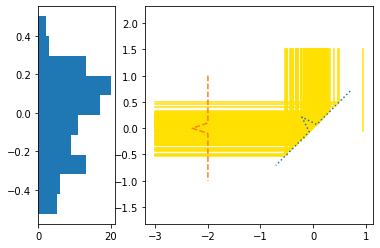

In [143]:
fig, ax = plt.subplots(1,2, gridspec_kw={"width_ratios":(1,3)})
scene.plot(ax[1])
ax[1].axis("equal")
ax[0].hist(canvas.points, orientation="horizontal")

# Momentum transferred as a function of ray number (random bundle)

In [144]:
ms = []
ns = np.linspace(1e2,1e4,20).astype(int)
for n in tqdm(ns):
    bundle = two_d_tracer.RandomRayBundle([-4,2], [1,0], n, 1, 600, two_d_tracer.gaussian_randoms_factory(4), two_d_tracer.random_sign)
    sc_dsc = {
        "rays": bundle.rays,
        "objects": [two_d_tracer.Sphere([0,0], 2, None, 1, n_glass)]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run(limit=7)
    ms.append(scene.momentum)
ms = np.array(ms)

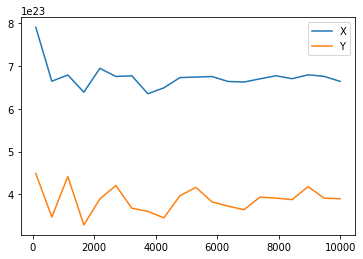

In [145]:
fig,ax = plt.subplots()
ax.plot(ns, ms[:,0], label="X")
ax.plot(ns, ms[:,1], label="Y")
ax.legend()

# RayBundle (with weights)

In [146]:
sc_dsc = {
    "rays": two_d_tracer.RayBundle([0,1.5], [0,-1], 2, 1000, 600, lambda pos: np.exp(-5*pos[0]**2)).rays,
    "objects": [two_d_tracer.Sphere([0,0],1.5,n_in=n_glass, mask=[0,np.pi])]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()
scene.propagate(2)

(-4.514082683908517, 4.514082683908517, -4.949998933126871, 4.949987378081611)

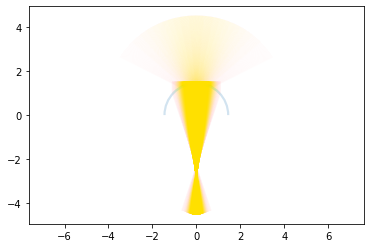

In [147]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [148]:
canvas = two_d_tracer.RayCanvas([0,0.5],[-1,0],0.5)
sc_dsc = {
    "rays": two_d_tracer.RayBundle([1,1.5], [0.01,-1], 1, 100, 600, lambda pos: np.exp(-5*(pos[0]-1)**2)).rays,
    "objects": [two_d_tracer.ParabolaReflective(0.5,0,0, xrange=(-2,2)), canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run(limit=2)
scene.propagate(2)

(-2.2009999250057244,
 2.220998425120215,
 -1.6981772579606766,
 2.830022165295044)

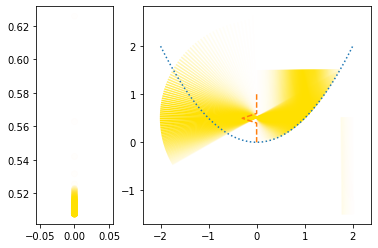

In [149]:
fig, ax = plt.subplots(1,2, gridspec_kw={"width_ratios":(1,3)})
ax[0].scatter([0 for p in canvas.points], canvas.points, c=canvas.ca)
scene.plot(ax[1])
ax[1].axis("equal")

# Actual Gaussian distribution?

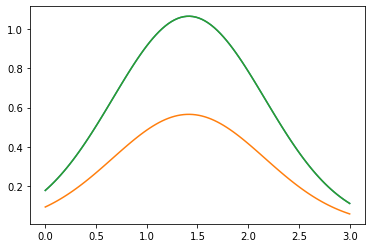

In [150]:
g = two_d_tracer.gaussian_intensity_factory(2, 1.5, [1,1.5])
start = np.array([0,0.5])
d = np.array([1,1])/np.sqrt(2)
xrange = np.linspace(0,3,100)
posrange = np.array([start+s*d for s in xrange])
fig, ax = plt.subplots()
ax.plot(xrange, [g(pos) for pos in posrange])
ax.plot(xrange, 2*2/np.pi/1.5**2 * np.exp(-2*(xrange-np.sqrt(2))**2/1.5**2))
ax.plot(xrange, np.sqrt(2/np.pi)* 2/1.5 * np.exp(-2*(xrange-np.sqrt(2))**2/1.5**2))

In [151]:
tb = two_d_tracer.RayBundle([0,0],[1,0],2,100,600, two_d_tracer.gaussian_intensity_factory(1,0.5,[0,0]), label="Test")

In [152]:
tb

Test: RayBundle(100 rays)

In [153]:
# If power is 1, how many photons is that?
1 / (6.62607004e-25 * 299792458/600*1e-9)

3.0204699906687257e+27

In [154]:
# How many "photons" have we generated?
np.sum([ray.weight for ray in tb.rays])

3.0204699906687224e+27

In [155]:
np.sum([ray.weight*6.62607004e-25 * 299792458/ray.wavelength*1e-9 for ray in tb.rays])

0.9999999999999989

In [14]:
canvas = two_d_tracer.RayCanvas([0,-2.9],[0,1],0.5)
sc_dsc = {
    "rays": two_d_tracer.RayBundle([0,1.5], [0,-1], 1, 100, 600, two_d_tracer.gaussian_intensity_factory(1,0.5,[0,1.5])).rays,
    "objects": [two_d_tracer.Sphere([0,0],1.5,n_in=n_glass, mask=[0,np.pi]), canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()
scene.propagate(2)

In [15]:
np.sum([ray.weight*6.62607004e-25 * 299792458/ray.wavelength*1e-9 for ray in scene.rays])

9.999369423289888e-10

<IPython.core.display.Javascript object>


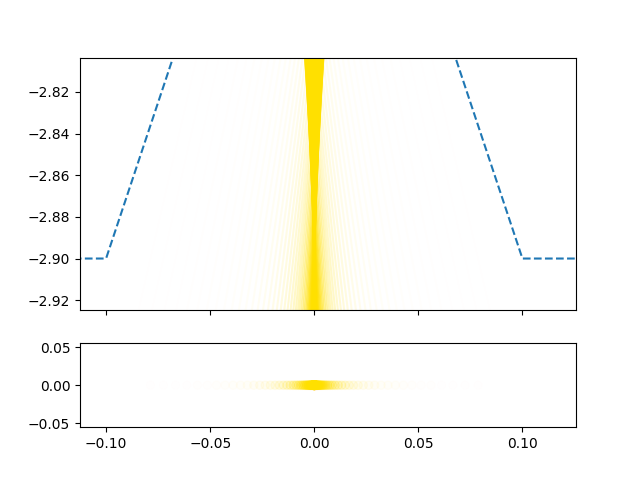

In [16]:
fig, ax = plt.subplots(2, gridspec_kw={"height_ratios":(3,1)}, sharex=True)
scene.plot(ax[0])
ax[0].axis("equal")
ax[1].scatter(canvas.points, [0 for p in canvas.points], c=np.column_stack((np.array(canvas.c), canvas.alphas)))

# Ray number dependence for the new ray bundle

In [30]:
# %%snakeviz
ms = []
ns = np.linspace(3000,1e4,10).astype(int)
for n in tqdm(ns):
    bundle = two_d_tracer.RayBundle([-4,-3], [1,0], 1, n, 600, two_d_tracer.gaussian_intensity_factory(1,4,[-3,0]))
    sc_dsc = {
        "rays": bundle.rays,
        "objects": [two_d_tracer.Sphere([0,-3], 1, None, 1, n_glass)]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run(limit=7)
    ms.append(scene.momentum)
ms = np.array(ms)

In [31]:
# %%snakeviz
ms2 = []
ns = np.linspace(3000,1e4,10).astype(int)
for n in tqdm(ns):
    bundle = two_d_tracer.RayBundle([-4,-3], [1,0], 1.1, n, 600, two_d_tracer.gaussian_intensity_factory(1,4,[-3,0]))
    sc_dsc = {
        "rays": bundle.rays,
        "objects": [two_d_tracer.Sphere([0,-3], 1, None, 1, n_glass)]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run(limit=7)
    ms2.append(scene.momentum)
ms2 = np.array(ms2)

<IPython.core.display.Javascript object>


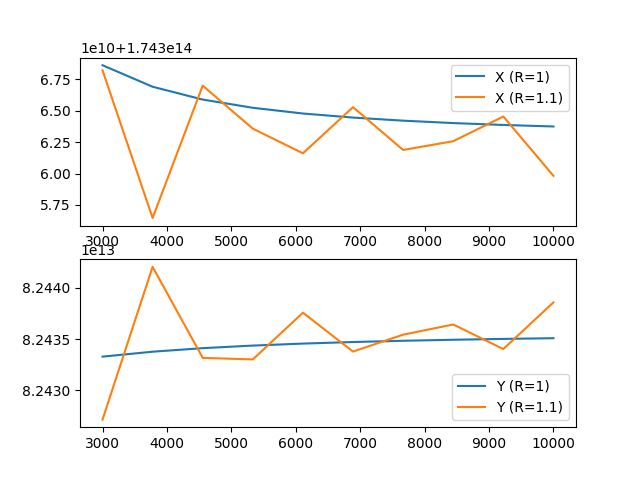

In [33]:
fig,ax = plt.subplots(2)
ax[0].plot(ns, ms[:,0], label="X (R=1)")
ax[0].plot(ns, ms2[:,0], label="X (R=1.1)")
ax[1].plot(ns, ms[:,1], label="Y (R=1)")
ax[1].plot(ns, ms2[:,1], label="Y (R=1.1)")


for axis in ax:
    axis.legend()

In [161]:
# Should be smaller than 1
np.sum([ray.weight*6.62607004e-25 * 299792458/ray.wavelength*1e-9 for ray in scene.rays])

0.1199358491463557

# Partial reflection and refraction

In [162]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1,0.1], [1,-0.1])],
    "objects": [two_d_tracer.Surface([0,0], [0, 1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

(-1.1, 1.1, -0.8007171790125603, 0.35241510376250285)

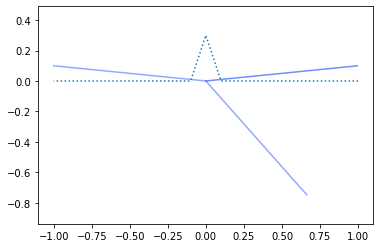

In [163]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [164]:
scene.rays[0].weight

0.4268743379291373

# Momentum conservation for partial ref

In [165]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1,0], [1,0],1)],
    "objects": [two_d_tracer.Surface([0,0], [-1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [166]:
initial = np.sum([1/ray.wavelength*ray.dir*ray.weight for ray in scene.rays], axis=0)
print(initial)

[1. 0.]


In [167]:
scene.run(limit=100)

In [168]:
np.sum([1/ray.wavelength*ray.dir*ray.weight for ray in scene.rays], axis=0)

array([0.92, 0.  ])

In [169]:
1/scene.rays[0].wavelength*scene.rays[0].dir*scene.rays[0].weight*1.5 + 1/scene.rays[1].wavelength*scene.rays[1].dir*scene.rays[1].weight

array([1.4, 0. ])

In [170]:
scene.momentum

array([-0.4,  0. ])

(-1.10000000022, 1.10000000022, -1.1, 1.1)

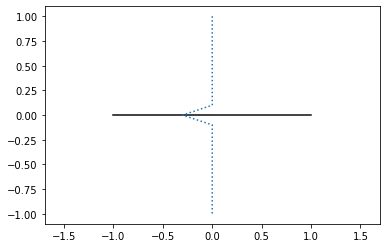

In [171]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

# Momentum and analytical solutions

## A single photon

In [44]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5,0],[1,0],600,15,1)],
    "objects": [two_d_tracer.SurfaceReflective([0,0], [-1,0])]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()
scene.propagate(2)

In [45]:
# All momenta values need to be multiplied by h (Planck's constant) * 1e9 (wavelength is stored in nm)
scene.momentum[0]*6.62607004e-34*1e9

3.31303502e-26

In [46]:
# Expected:
2*6.62607004e-34/600e-9*15

3.31303502e-26

## Ray bundle

In [39]:
sc_dsc = {
    "rays": two_d_tracer.RayBundle([-1.5,2], [1,0], 1.5, 100, 600, two_d_tracer.gaussian_intensity_factory(1,0.5,[-1.5,2])).rays,
    "objects": [two_d_tracer.SurfaceReflective([0,0], [-1,0])]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()
scene.propagate(2)

<IPython.core.display.Javascript object>


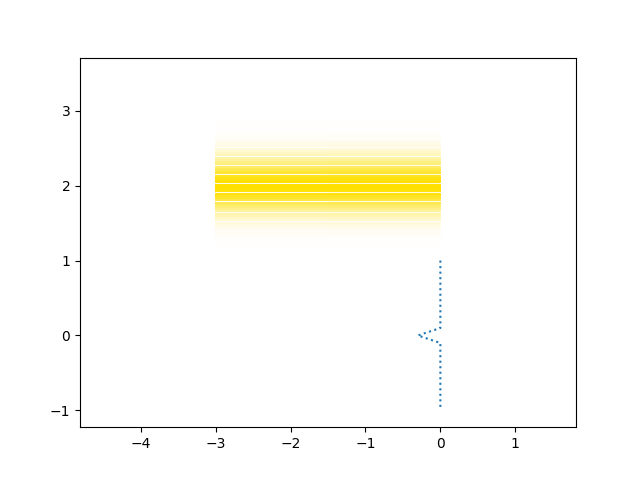

(-3.15000000021, 0.15000000001000002, -1.22425, 3.70925)

In [40]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [41]:
# All momenta values need to be multiplied by h (Planck's constant) * 1e-9 (wavelength is stored in nm)
scene.momentum[0]*6.62607004e-34*1e9

6.671281891087279e-09

In [95]:
2*1/299792458

6.671281903963041e-09

In [99]:
# Angular momentum
scene.objects[0].angular_momentum*6.62607004e-34*1e9

-1.3342563782174555e-08

In [98]:
-2*1/299792458*2

-1.3342563807926082e-08

# Profiling?

In [34]:
import cProfile
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [35]:
sc_dsc = {
    "rays": two_d_tracer.RayBundle([0,1.5], [0,-1], 1, 10000, 600, two_d_tracer.gaussian_intensity_factory(1,0.5,[0,1.5])).rays,
    "objects": [two_d_tracer.Sphere([0,0],1.5,n_in=n_glass, mask=[0,np.pi])]
}
scene = two_d_tracer.Scene(**sc_dsc)
%snakeviz scene.run()

 
*** Profile stats marshalled to file '/tmp/tmpzwuq4mul'. 
Embedding SnakeViz in this document...


In [174]:
v = np.array([5,2])

In [175]:
%timeit two_d_tracer.normalize(v)

4.55 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [176]:
def normalize(v):
    return v / np.sqrt(v.dot(v))
%timeit normalize(v)

4.44 µs ± 84 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [177]:
def normalize(v):
    return v / np.sqrt(v[0]**2+v[1]**2)
%timeit normalize(v)

4.33 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [178]:
%%timeit
l = [0,1,2,3,4]
l.append(5)

141 ns ± 12.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [179]:
%%timeit
l = [0,1,2,3,4]
l += [5]

129 ns ± 7.68 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [180]:
def nm_to_hsv(wvl, margin=30):
    wv = np.array([380, 460, 480, 515, 590, 630, 670])
    hv = np.array([197, 174, 135, 89, 42, 23, 0])/255
    h = np.interp(wvl, wv, hv)
    v = np.interp(wvl, [380, 380+margin, 740-margin, 740], [0, 1, 1, 0])
    return (h, 1, v)

In [181]:
%timeit nm_to_hsv(523)

15.7 µs ± 277 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [182]:
from scipy.interpolate import interp1d
wv = np.array([380, 460, 480, 515, 590, 630, 670])
hv = np.array([197, 174, 135, 89, 42, 23, 0])/255
h = interp1d(wv, hv, kind="linear")
v = interp1d([380, 380+30, 740-30, 740], [0, 1, 1, 0], kind="linear")
def nm_to_hsv2(wvl):
    return (h(wvl), 1, v(wvl))

In [183]:
%timeit nm_to_hsv2(523)

123 µs ± 15.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [184]:
%timeit two_d_tracer.nm_to_rgb(532)

79.3 µs ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [185]:
from skimage.color import hsv2rgb
def nm_to_rgb(wvl, margin=30):
    wv = np.array([380, 460, 480, 515, 590, 630, 670])
    hv = np.array([197, 174, 135, 89, 42, 23, 0])/255
    h = np.interp(wvl, wv, hv)
    v = np.interp(wvl, [380, 380+margin, 740-margin, 740], [0, 1, 1, 0])
    return hsv2rgb((h, 1, v))

In [186]:
%timeit nm_to_rgb(532)

141 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
